# Michaelis Menten

This example shows how the the Michaelis Menten model can be used.
The Michaelis Menten model is a stochastic model, and more details about the determinstic analogue can be found [here](https://en.wikipedia.org/wiki/Michaelis-Menten_kinetics).

Its reactions are:
$$X_1 + X_2 \xrightarrow{} X_3$$
$$X_3 \xrightarrow{} X_1 + X_2$$
$$X_3 \xrightarrow{} X_2 + X_4$$

The model is simulated according to the Gillespie stochastic simulation algorithm (Gillespie, 1976).

In [43]:
import pints
import pints.toy.stochastic
import matplotlib.pyplot as plt
import numpy as np

Specify initial concentration, time points at which to record concentration values, and rate constant value (k).

In [44]:
x_0 = [1e4, 2e3, 2e4, 0]
model = pints.toy.stochastic.MichaelisMentenModel(x_0)

times = np.linspace(0, 24, 100)
k = [1e-5, 0.2, 0.2]

The main option is to use the model's ```simulate``` function. This function, given a set of parameters and times, computes the appropriate times and counts of molecules using Gillespie's algorithm and then uses interpolation to find the values at the exact times requested. Since Gillespie's algorithm returns only the times at which the molecule count is changed, these times may not correspond to the times at which we requested the molecule count. Therefore, the interpolation is used by the ```simulate``` function to extend the molecule counts to the times requested.

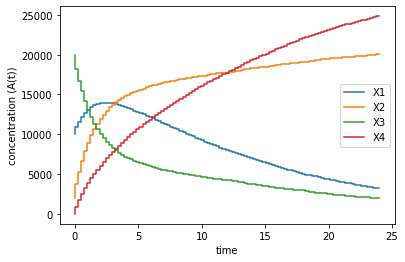

In [45]:
first_values = model.simulate(k, times)

plt.step(times, first_values[:,0], label = 'X1')
plt.step(times, first_values[:,1], label = 'X2')
plt.step(times, first_values[:,2], label = 'X3')
plt.step(times, first_values[:,3], label = 'X4')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (A(t))'),
plt.show()

Another option for simulating the model is by using the ```simulate_raw``` function. This gives the pure Gillespie's algorithm simulations of molecule counts, without interpolating them. Although more precise, these simulations are similar to the ones given by ```simulate```.

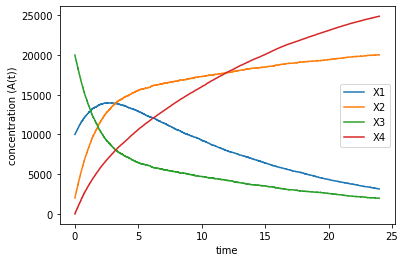

In [46]:
times, values = model.simulate_raw(k, 24)
values = np.array(values)

plt.step(times, values[:,0], label = 'X1')
plt.step(times, values[:,1], label = 'X2')
plt.step(times, values[:,2], label = 'X3')
plt.step(times, values[:,3], label = 'X4')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (A(t))'),
plt.show()

Given the stochastic nature of this model we can use multiple simulations to make sure that the runs are covering the same model with the same parameters. Our simulations are close, suggesting that there is not a large amount of stochasticity in these models for these initial values.

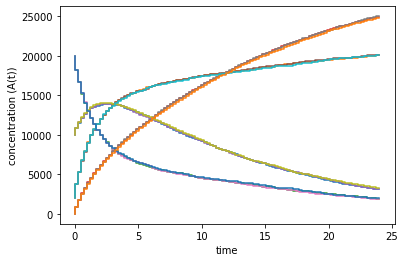

In [47]:
times = np.linspace(0, 24, 100)

for i in range(3):
    values = model.simulate(k, times)
    plt.step(times, values[:,0])
    plt.step(times, values[:,1])
    plt.step(times, values[:,2])
    plt.step(times, values[:,3])

plt.xlabel('time')
plt.ylabel('concentration (A(t))'),
plt.show()

To obtain higher stochasticity, we can use a model with smaller initial molecule counts to get more stochasticity, as in the example below.

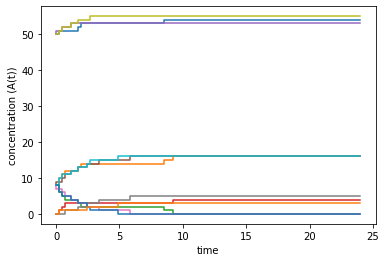

In [49]:
x_0 = [50, 8, 8, 0]
model = pints.toy.stochastic.MichaelisMentenModel(x_0)

times = np.linspace(0, 24, 100)

for i in range(3):
    values = model.simulate(k, times)
    plt.step(times, values[:,0])
    plt.step(times, values[:,1])
    plt.step(times, values[:,2])
    plt.step(times, values[:,3])

plt.xlabel('time')
plt.ylabel('concentration (A(t))'),
plt.show()

For the higher molecule counts version, we will compute the ODE solutions and compare them to our results.

In [50]:
def pend(y, t):
    x1, x2, x3, x4 = y
    dydt = [-k[0] * x1 * x2 + k[1] * x3, -k[0] * x1 * x2 + k[1] * x3 + k[2] * x3, k[0] * x1 * x2 - k[1] * x3 - k[2] * x3, k[2] * x3]
    return dydt

x_0 = [1e4, 2e3, 2e4, 0]
times = np.linspace(0, 24, 100)

from scipy.integrate import odeint
sol = odeint(pend, x_0, times)

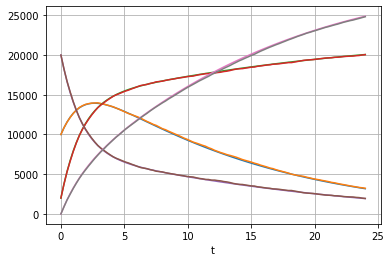

In [52]:
import matplotlib.pyplot as plt
plt.plot(times, sol[:, 0])
plt.plot(times, first_values[:, 0])
plt.plot(times, sol[:, 1])
plt.plot(times, first_values[:, 1])
plt.plot(times, sol[:, 2])
plt.plot(times, first_values[:, 2])
plt.plot(times, sol[:, 3])
plt.plot(times, first_values[:, 3])
plt.xlabel('t')
plt.grid()
plt.show()

As we can see, our model's simulations are indistinguishable close to the ODE solutions suggesting that our simulations are accurate.